# pandas

The pandas package helps you to work with *tabular* data, not for multi-dimensional grids.

## So why are we learning about pandas then?

- Pandas can be useful when you have made calculations on gridded datasets

- Xarray is inspired by and built on top of the pandas package

Pandas typically plays a bridging role in data analysis.  You have some other tool that generates the data -- such as a climate model.  You might use xarray to explore the multi-dimensional gridded data from the model.  

You calculate some lower dimensional fields from the model output and store them in pandas.  You can then use pandas to filter and plot the results.  

You then pass these results from pandas into another package such as sklearn to do statistical modelling on your results.


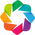

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv

%matplotlib inline
hv.notebook_extension('bokeh')

%load_ext autoreload
%autoreload 2

In [37]:
# Read in the data from the csv file
df = pd.read_csv('dublin_temperature_full.csv')
# Print out the first rows of the dataframe
df.head()

,date,max temperature,min temperature,rain,pressure,wind speed,sunshine hours
0,1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1,1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
2,1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
3,1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
4,1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


We would like to set the date column be the row index rather than just have an integer count as the index.

In [38]:
# Set the date column to be the index
df.set_index('date',inplace=True)
# Convert the date column to be a datetime object
df.index = pd.to_datetime(df.index)
# We will remove rows that are missing values
df = df.dropna()
df.head()

,max temperature,min temperature,rain,pressure,wind speed,sunshine hours
date,,,,,,
1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


Some of the column names have two words.  This makes it hard to use the built-in shortcuts. We want to rename any columns that have two words in their title,by joining these words up together using underscores.

In [39]:
# Dictionary comprehension that maps the original column names to the new column names where two word names are 
# joined together
column_mapping = {col_name :'_'.join(col_name.split()) for col_name in df.columns}
# Rename the columns
df.rename( columns = column_mapping, inplace = True )
# Show the current dataframe with the new column names
df.head()

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours
date,,,,,,
1967-02-05,8.5,2.3,0.0,1023.0,12.5,2.7
1967-02-06,8.6,5.3,0.0,1019.0,12.8,0.5
1967-02-07,7.5,-1.0,0.0,1021.9,3.7,5.6
1967-02-08,6.7,-2.6,0.0,1024.6,2.9,3.2
1967-02-09,7.2,3.3,0.0,1020.6,4.8,2.8


## Labelled data
- Each datapoint is now associated with a column name (e.g. rain) and an index value (e.g. 1969-07-15).
- We can use these labels when writing our code - this makes the code easier to read and write

For example,we can plot the rainfall column:

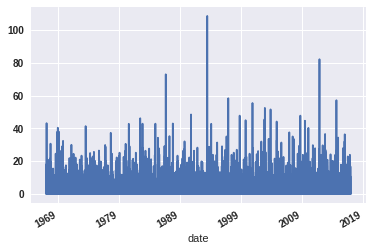

In [40]:
df.rain.plot()
plt.show()

## Indexing and accessing data in a dataframe

The labels help you to access data in a dataframe.  There are a number of ways to access data.  

#### Accessing columns
For example, the columns are now *attributes* of the dataframe ```df``` and so can be accessed using the dot notation

In [41]:
df.wind_speed.head()

date
1967-02-05    12.5
1967-02-06    12.8
1967-02-07     3.7
1967-02-08     2.9
1967-02-09     4.8
Name: wind_speed, dtype: float64

#### Accessing rows
To access data on a particular *row* of a dataframe, you *could* use numpy syntax.  To get the fifth element in the wind speed column for example, you can use:

In [42]:
df.wind_speed[4]

4.7999999999999998

However, using this numpy syntax can lead to problems when using pandas.  The numpy syntax also doesn't take advantage of the labels we have for rows and columns.

To take advantage of the labels, you should use the ```.loc``` method to access data in the dataframe. The syntax for ```.loc``` is that the first element in the square brackets sets the row and the second element sets the column.  This behaviour carries over to xarray.

In this case the fifth row of the dataframe is the 9th of February 1967 and we can access it as:

In [43]:
df.loc['1967-02-09', 'wind_speed']

4.7999999999999998

You can access multiple rows by slicing the first element:

In [10]:
df.loc['1967-02-07':'1967-02-09', 'wind_speed']

date
1967-02-07    3.7
1967-02-08    2.9
1967-02-09    4.8
Name: wind_speed, dtype: float64

and you can access multiple columns by making the second argument to ```.loc``` a tuple with column names:

In [11]:
df.loc['1967-02-07':'1967-02-09', ('max_temperature','wind_speed')]

,max_temperature,wind_speed
date,,
1967-02-07,7.5,3.7
1967-02-08,6.7,2.9
1967-02-09,7.2,4.8


#### Implicit index
You may want to access rows by using the position of the row or column rather than the label given to the row or column. In this case you use the ```.iloc``` method to access rows and columns.

The syntax is similar in that the first element sets the rows you access while the second element sets the columns:

In [12]:
# Access rows 3 and 4 and columns 0 and 1
df.iloc[3:5,0:2]

,max_temperature,min_temperature
date,,
1967-02-08,6.7,-2.6
1967-02-09,7.2,3.3


An importance difference between ```.loc``` and ```.iloc``` is where the indexing stops.  

For ```.loc``` the final element in a slice is *included* in the output, but for ```.iloc``` the final element in a 
slice is *excluded* in the output!

### Boolean operations
You can also use the ```.loc``` and ```.iloc``` methods to do Boolean operations on rows.  For example, we could select all the rows where the maximum temperature is greater than 30 C:

In [48]:
df.loc[df.max_temperature > 30]

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours
date,,,,,,
1975-08-03,30.5,12.0,0.0,1011.9,4.2,12.7
2006-07-19,31.0,15.1,0.0,1004.2,6.0,9.8


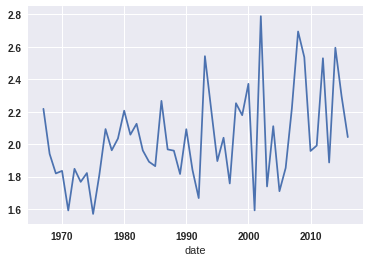

In [71]:
#df.groupby(df.index.year)[df.rain > 10].count()


In [66]:
df.count?

And we see that this has occurred twice (twice!!) in this 50-year long dataset.

## Fast computation with pandas

Pandas has many built-in features to do fast computation.

Operations on columns are vectorised:

In [14]:
df['mean_temperature'] = df.min_temperature + df.max_temperature

There are also numerous built-in functions for calculating statistics on your data:

In [15]:
df.min_temperature.quantile(0.1)

-0.2

This means that only about 1 in 10 days has had a *minimum* temperature below freezing degrees in Dublin.

## Accessing and assigning values using .loc
- The safe way to access data in a dataframe is to use the .loc method
- This behaviour carries over to xarray

# GroupBy
A common research objective is to compare different subsets of our dataset e.g. different months, regions, instruments and so on. 

1. This means that we want to *split* out dataset into the different subsets
2. We want to *apply* an operation to each subset e.g. take the mean
3. We want to re-combine the results of these operations into a *new* dataframe

## Doing *split*, *apply* and *combine* with `.groupby()`
Pandas comes with a method to carry out this split, apply and combine
operation called `.groupby()`.
We can see the steps in this process in this schematic from the
[excellent Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)
![](https://github.com/jakevdp/PythonDataScienceHandbook/raw/058289a6a8a544d2bc144ba0226d6ef27986e4e0/notebooks/figures/03.08-split-apply-combine.png)



You can use groupby combined with a datetime index to do things like extract the seasonal cycle in an efficient way:

In [16]:
# Take the mean of the columns by month
climatology = df.groupby( df.index.month ).mean()
climatology.head()

,max_temperature,min_temperature,rain,pressure,wind_speed,sunshine_hours,mean_temperature
date,,,,,,,
1,7.919816,2.147597,2.151350,999.814493,13.247860,1.687813,10.067413
2,8.009297,1.851455,1.844247,1001.514844,12.158623,2.510945,9.860752
3,9.932258,2.561459,1.584065,1002.107235,11.926194,3.317677,12.493028
4,12.148333,3.483856,1.658000,1003.203867,9.646667,5.125467,15.631221
5,14.917290,6.062839,1.927806,1003.156294,9.091097,5.810774,20.980129


By taking the mean after doing the groupby, we create a new dataframe called ```climatology``` where the index corresponds to the month number.  We can use this to plot the seasonal cycle:

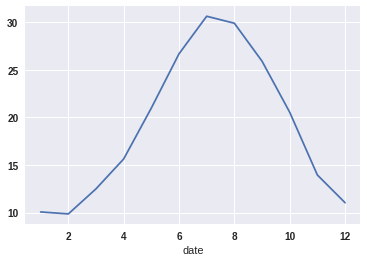

In [17]:
# Plot the seasonal cycle
climatology.mean_temperature.plot()
plt.show()

We can also look at the variation through time of the rainfall.

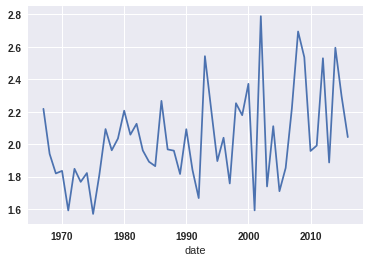

In [73]:
df.groupby(df.index.year)['rain'].mean().plot()

You can also use ```.groupby``` to look at extreme value fields. For example, we can look at the number of days per year with more than 10 mm of rainfall:

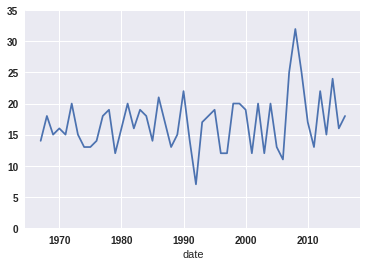

In [92]:
df[df.rain > 10].groupby(df[df.rain > 10].index.year).rain.count().plot(ylim = (0,35))

### Exercise
Look at how other extreme weather values have varied in Dublin over the last 50 years.

When considering a threshold for an extreme maximum temperature, bear in mind the following quote from one of my cousins:

"It is a well known scientific fact, that Irish people **melt** at temperatures above 25 degrees".

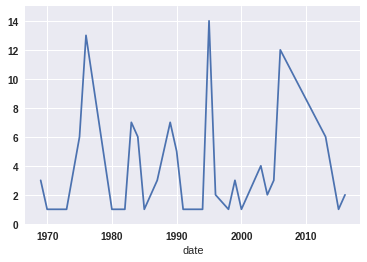

In [97]:
df[df.max_temperature > 25].groupby(df[df.max_temperature > 25].index.year).max_temperature.count().plot(ylim = (0,15))

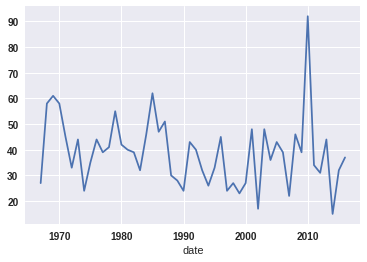

In [100]:
df[df.min_temperature < 0].groupby(df[df.min_temperature < 0].index.year).min_temperature.count().plot()

The default units are *nanoseconds* for the NumPy/Pandas/Xarray timeseries object (a relevant time scale for hedge funds!). This limits the ranges of dates it can support to 1668 - 2262.  If you want to have a longer time span, then you need to [specify a coarser interval](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html#datetime-units)

## Plotting with pandas

Pandas has built-in functionality for plotting with matplotlib.  For example, you can do a scatter plot like this:

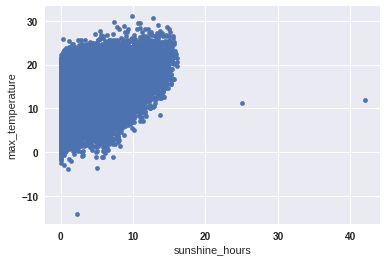

In [72]:
df.plot(x = 'sunshine_hours', y = 'max_temperature', kind = 'scatter')
plt.show()

That's quite a lot of data though, so you can also restrict the date range using ```.loc```:

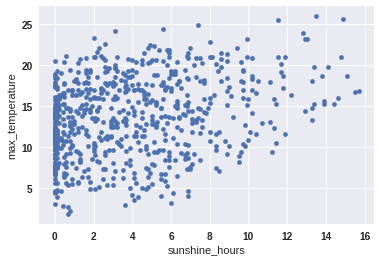

In [19]:
df.loc[(df.index >'2015-1-1')].plot(x = 'sunshine_hours', y = 'max_temperature', kind = 'scatter')
plt.show()

The seaborn package is pandas-aware and has more plotting alternatives:

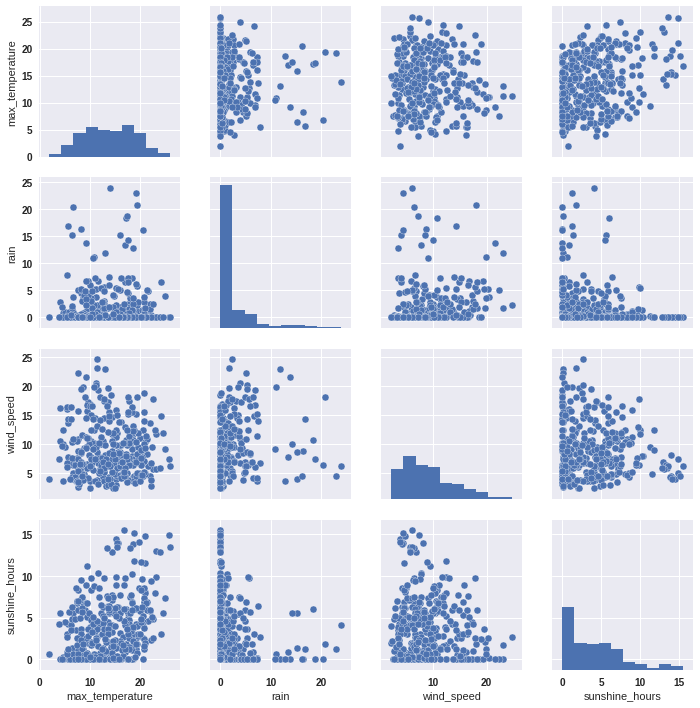

In [29]:
sns.pairplot(df.loc[df.index > '2016-1-1',('max_temperature', 'rain', 'wind_speed', 'sunshine_hours')])

In matplotlib you can also provide a dataframe to produce a plot using the ```data``` keyword argument:

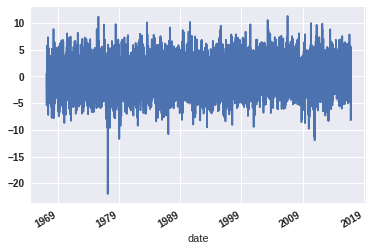

In [91]:
df.groupby(df.index.month).max_temperature.transform(lambda x: x - x.mean()).plot()

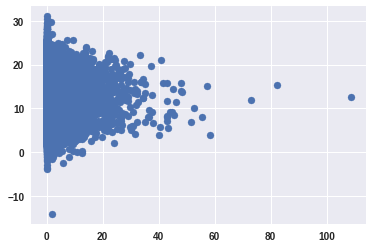

In [33]:
fig, ax  = plt.subplots()
ax.scatter('rain','max_temperature', data = df)

## Disadvantages of using pandas

While pandas has many useful features, there are some disadvantages to be aware of:
- pandas can be memory intensive due to lots of copying of datasets internally when carrying out operations
A rule of thumb is that you need five to ten times more memory than the size of your dataset
- Operations are generally carried in serial rather than parallel
The dask package provides a way to carry out dataframe operations in parallel
- There is no query planning
Say you want to find out the mean rainfall on days when there is some rainfall.  You execute something like: ```df.loc[df.rain > 0].rain.mean()```.  You imagine that pandas will look at the rain column and take the mean of the days when there is non-zero rain.  In fact, pandas first creates a new dataframe in memory with *all the columns* and the rows with non-zero rain.  It then looks at the rain column of this new dataframe and calculates the mean of the rain column.  If your dataset is large this will incur a significant cost. Again, the dask package we look at next can provide a partial solution to this problem.

# This is not an exit!

This has just been the briefest of intros to the pandas package.  If you want to learn more, I'd recommend: 
- the chapter on pandas in [the python data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
- or [this blog post on selecting data](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c)

Pandas is part of the first generation of data analysis tools in python.  Work is underway to develop libraries that will allow more efficient data analysis in pandas in the future.  You can read more about that [in this blog post](http://wesmckinney.com/blog/apache-arrow-pandas-internals/).